In [74]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import csv
import os

In [75]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [76]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | itoman
Processing Record 7 of Set 1 | ostrovnoy
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | sao filipe
Processing Record 10 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | vostok
Processing Record 17 of Set 1 | batemans bay
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 21 of Set 1 | tabiaue

Processing Record 34 of Set 4 | clarence town
Processing Record 35 of Set 4 | talnakh
Processing Record 36 of Set 4 | singarayakonda
Processing Record 37 of Set 4 | alugan
Processing Record 38 of Set 4 | komsomolskiy
Processing Record 39 of Set 4 | port macquarie
Processing Record 40 of Set 4 | yellowknife
Processing Record 41 of Set 4 | husavik
Processing Record 42 of Set 4 | tevaitoa
Processing Record 43 of Set 4 | lebu
Processing Record 44 of Set 4 | barawe
City not found. Skipping...
Processing Record 45 of Set 4 | lakota
Processing Record 46 of Set 4 | cabedelo
Processing Record 47 of Set 4 | mabaruma
Processing Record 48 of Set 4 | oyama
Processing Record 49 of Set 4 | kavieng
Processing Record 50 of Set 4 | lianzhou
Processing Record 1 of Set 5 | landang
City not found. Skipping...
Processing Record 2 of Set 5 | xining
Processing Record 3 of Set 5 | padang
Processing Record 4 of Set 5 | nanortalik
Processing Record 5 of Set 5 | villamontes
Processing Record 6 of Set 5 | graham
P

Processing Record 27 of Set 8 | lugovskoy
Processing Record 28 of Set 8 | ostersund
Processing Record 29 of Set 8 | hasaki
Processing Record 30 of Set 8 | sechura
Processing Record 31 of Set 8 | kununurra
Processing Record 32 of Set 8 | choya
Processing Record 33 of Set 8 | udachnyy
Processing Record 34 of Set 8 | udayagiri
Processing Record 35 of Set 8 | san agustin
Processing Record 36 of Set 8 | galesong
Processing Record 37 of Set 8 | tuatapere
Processing Record 38 of Set 8 | juifang
City not found. Skipping...
Processing Record 39 of Set 8 | sadon
Processing Record 40 of Set 8 | shenjiamen
Processing Record 41 of Set 8 | gat
Processing Record 42 of Set 8 | itarema
Processing Record 43 of Set 8 | banda aceh
Processing Record 44 of Set 8 | alexander city
Processing Record 45 of Set 8 | dicabisagan
Processing Record 46 of Set 8 | la romana
Processing Record 47 of Set 8 | port keats
Processing Record 48 of Set 8 | lowicz
Processing Record 49 of Set 8 | broken hill
Processing Record 50

KeyboardInterrupt: 

In [15]:
len(city_data)

501

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,81.30,81,54,16.93,KI,2022-04-05 20:32:57
1,Tasiilaq,65.6145,-37.6368,24.96,95,45,5.88,GL,2022-04-05 20:32:57
2,Ushuaia,-54.8000,-68.3000,40.62,87,75,27.63,AR,2022-04-05 20:32:58
3,Atuona,-9.8000,-139.0333,79.65,70,3,23.47,PF,2022-04-05 20:32:58
4,Vaini,-21.2000,-175.2000,80.76,78,40,0.00,TO,2022-04-05 20:32:58
5,Itoman,26.1247,127.6694,66.22,62,100,11.50,JP,2022-04-05 20:32:59
6,Ostrovnoy,68.0531,39.5131,24.87,87,100,13.85,RU,2022-04-05 20:32:59
7,Mataura,-46.1927,168.8643,51.62,66,30,9.80,NZ,2022-04-05 20:32:59
8,Sao Filipe,14.8961,-24.4956,71.29,73,6,9.62,CV,2022-04-05 20:33:00
9,Hermanus,-34.4187,19.2345,59.81,80,1,13.91,ZA,2022-04-05 20:33:00


In [20]:
#recorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2022-04-05 20:32:57,3.0707,172.7902,81.30,81,54,16.93
1,Tasiilaq,GL,2022-04-05 20:32:57,65.6145,-37.6368,24.96,95,45,5.88
2,Ushuaia,AR,2022-04-05 20:32:58,-54.8000,-68.3000,40.62,87,75,27.63
3,Atuona,PF,2022-04-05 20:32:58,-9.8000,-139.0333,79.65,70,3,23.47
4,Vaini,TO,2022-04-05 20:32:58,-21.2000,-175.2000,80.76,78,40,0.00
5,Itoman,JP,2022-04-05 20:32:59,26.1247,127.6694,66.22,62,100,11.50
6,Ostrovnoy,RU,2022-04-05 20:32:59,68.0531,39.5131,24.87,87,100,13.85
7,Mataura,NZ,2022-04-05 20:32:59,-46.1927,168.8643,51.62,66,30,9.80
8,Sao Filipe,CV,2022-04-05 20:33:00,14.8961,-24.4956,71.29,73,6,9.62
9,Hermanus,ZA,2022-04-05 20:33:00,-34.4187,19.2345,59.81,80,1,13.91


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

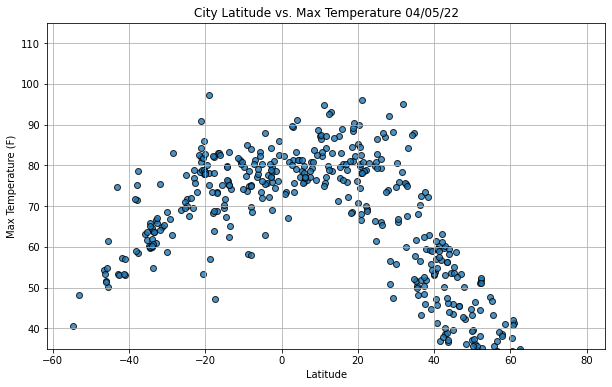

In [41]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.figure(figsize=(10,6))
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(35, 115, 10)
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

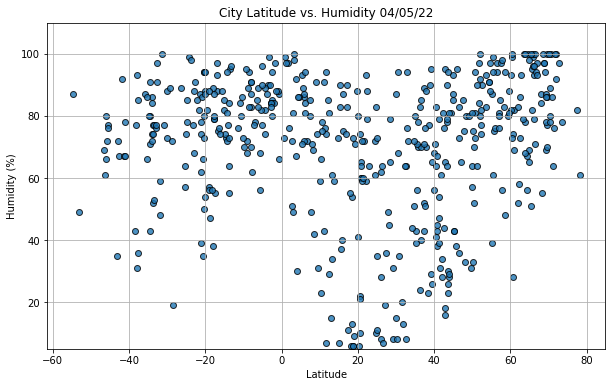

In [45]:
# Build the scatter plots for latitude vs. humidity.
plt.figure(figsize=(10,6))
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(5, 110, 20)
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

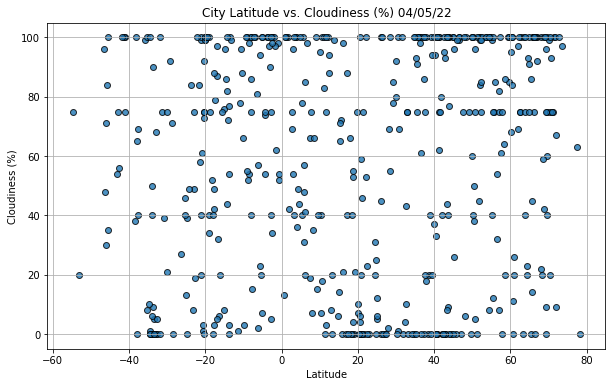

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.figure(figsize=(10,6))
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

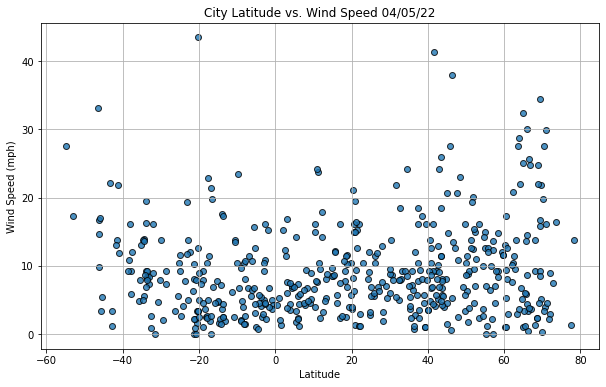

In [49]:
# Build the scatter plots for latitude vs. wind speed.
plt.figure(figsize=(10,6))
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [57]:
# Add a variable to load a file from a path.
city_data = "weather_data/cities.csv"
city_data

'weather_data/cities.csv'

In [63]:
#read the data and store into a Pandas DataFrame
city_data_df = pd.read_csv(city_data)
city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Butaritari,KI,2022-04-05 20:32:57,3.0707,172.7902,81.30,81,54,16.93
1,1,Tasiilaq,GL,2022-04-05 20:32:57,65.6145,-37.6368,24.96,95,45,5.88
2,2,Ushuaia,AR,2022-04-05 20:32:58,-54.8000,-68.3000,40.62,87,75,27.63
3,3,Atuona,PF,2022-04-05 20:32:58,-9.8000,-139.0333,79.65,70,3,23.47
4,4,Vaini,TO,2022-04-05 20:32:58,-21.2000,-175.2000,80.76,78,40,0.00
5,5,Itoman,JP,2022-04-05 20:32:59,26.1247,127.6694,66.22,62,100,11.50
6,6,Ostrovnoy,RU,2022-04-05 20:32:59,68.0531,39.5131,24.87,87,100,13.85
7,7,Mataura,NZ,2022-04-05 20:32:59,-46.1927,168.8643,51.62,66,30,9.80
8,8,Sao Filipe,CV,2022-04-05 20:33:00,14.8961,-24.4956,71.29,73,6,9.62
9,9,Hermanus,ZA,2022-04-05 20:33:00,-34.4187,19.2345,59.81,80,1,13.91


In [82]:
 # Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [69]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                       Vostok
Country                        RU
Date          2022-04-05 20:29:05
Lat                       46.4856
Lng                      135.8833
Max Temp                    21.27
Humidity                       83
Cloudiness                    100
Wind Speed                  13.56
Name: 13, dtype: object

In [70]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
496     True
497     True
498     True
499    False
500     True
Name: Lat, Length: 501, dtype: bool

In [77]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Butaritari,KI,2022-04-05 20:32:57,3.0707,172.7902,81.30,81,54,16.93
1,1,Tasiilaq,GL,2022-04-05 20:32:57,65.6145,-37.6368,24.96,95,45,5.88
5,5,Itoman,JP,2022-04-05 20:32:59,26.1247,127.6694,66.22,62,100,11.50
6,6,Ostrovnoy,RU,2022-04-05 20:32:59,68.0531,39.5131,24.87,87,100,13.85
8,8,Sao Filipe,CV,2022-04-05 20:33:00,14.8961,-24.4956,71.29,73,6,9.62


In [78]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

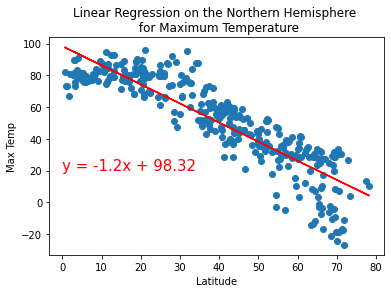

-0.8828051258719355


In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(0, 20))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

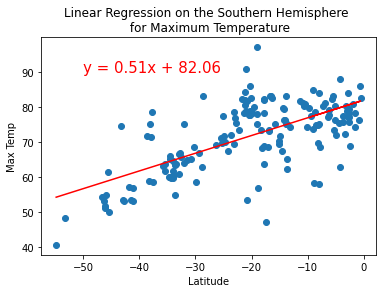

0.6664429127932258


In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,90))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

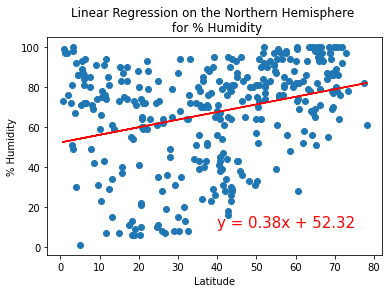

0.3073282266797679


In [100]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

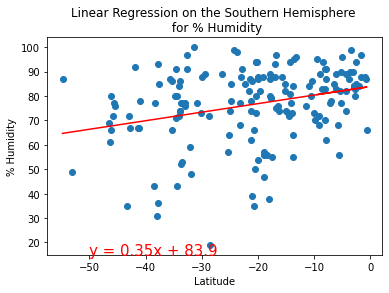

0.2998961221570157


In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

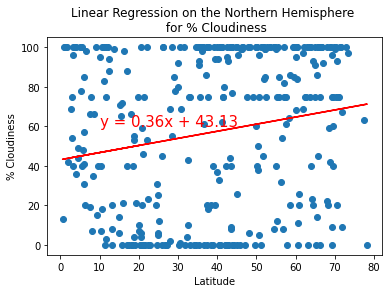

0.1896474135545346


In [102]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,60))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

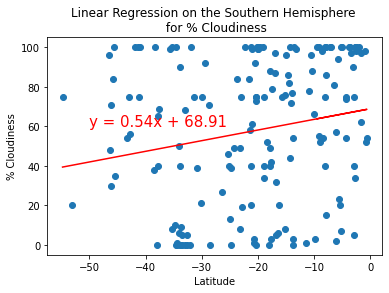

0.19499304896502595


In [104]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

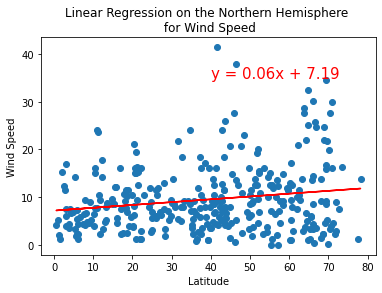

0.17859128822013554


In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

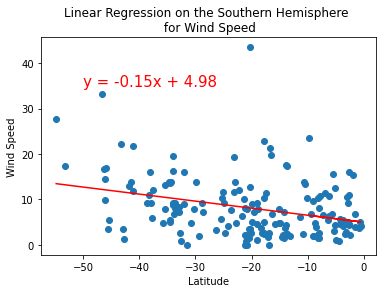

-0.3129540206648548


In [106]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)